# WildObs Tech Demo: Using YoloV11 for Australian Animal Detection

WildObs is a new national platform that will provide and end-to-end solution for wildlife monitoring in Australia. One of its key features is the ability to automatically detect Australian animals in images. For this, the WildObs team is developing the next generation of Australia's animal detection models using existing national and international tools.

In this notebook, we use the powerful image hosting services of the Atlas of Living Australia (ALA) and the new YoloV11 model to demonstrate how to use a base model to detect Australian animals in images. Let's see how good is this model at detecting an iconic Australian animal, the echidna

## Install Required Libraries
For this demo we will need the following libraries:
- `ultralytics` for the YoloV11 model
- `pandas` for data manipulation
- `pathlib` for file manipulation

You can install them using the following command:
```bash
!pip install -q ultralytics pandas pathlib
```


# Load the libraries

In [1]:
import os
from pathlib import Path
from ultralytics import YOLO 
import pandas as pd
import galah

## Download the images
Download images from ALA using Galah-python library



In [2]:
# Config galah with region and email + define directory
galah.galah_config(atlas="Australia")
galah.galah_config(email="daraka.hewavithanage@qcif.edu.au")

# Define the path to the folder containing the images
image_folder = 'media' 

# Download images of Tachyglossus aculeatus from 2024-10-20T00:00:00Z
galah.atlas_media(taxa="Tachyglossus aculeatus", filters= ["year=2024", "cl22=Queensland"], multimedia="images", collect=True, path=image_folder)

100%|██████████| 9/9 [00:05<00:00,  1.74it/s]

Media written to media


decimalLatitude  decimalLongitude             eventDate  \
0       -38.333400        144.707092  2024-10-20T10:56:51Z   
1       -38.189464        145.327182  2024-10-20T13:40:29Z   
2       -38.159380        145.223575  2024-10-20T13:46:50Z   
3       -38.062126        145.248060  2024-10-20T13:30:45Z   
4       -37.568130        142.180772  2024-10-20T12:33:42Z   
5       -41.428925        147.186937  2024-10-20T12:21:10Z   
6       -41.428925        147.186937  2024-10-20T12:21:10Z   
7       -38.304305        144.653855  2024-10-20T11:45:22Z   
8       -38.304305        144.653855  2024-10-20T11:45:22Z   

                     scientificName                              recordID  \
0  Tachyglossus aculeatus aculeatus  b4623b41-ef2c-4657-a8ae-bb33aebd814a   
1  Tachyglossus aculeatus aculeatus  6a2a1375-c30d-409d-908a-f8dbd3244057   
2  Tachyglossus aculeatus aculeatus  699aa6c3-851b-4c8b-9594-15ecb51bafc2   
3  Tachyglossus aculeatus aculeatus  8b7ff41c-87ee-4bad-b30f-19ddac538a1e   
4  Tachyglossus aculeatus aculeatus  16f4938b-d7cf-4a38-911d-c70b3a9704f7   
5    Tachyglossus aculeatus setosus  b4623a27-21bc-401b-abe8-09222dec38d5   
6    Tachyglossus aculeatus setosus  b4623a27-21bc-401b-abe8-09222dec38d5   
7  Tachyglossus aculeatus aculeatus  92bcf668-acf8-478b-afaa-23b353301750   
8  Tachyglossus aculeatus aculeatus  92bcf668-acf8-478b-afaa-23b353301750   

        dataResourceName occurrenceStatus multimedia  \
0  iNaturalist Australia          PRESENT      Image   
1  iNaturalist Australia          PRESENT      Image   
2  iNaturalist Australia          PRESENT      Image   
3  iNaturalist Australia          PRESENT      Image   
4  iNaturalist Australia          PRESENT      Image   
5  iNaturalist Australia          PRESENT      Image   
6  iNaturalist Australia          PRESENT      Image   
7  iNaturalist Australia          PRESENT      Image   
8  iNaturalist Australia          PRESENT      Image   

                                 images  videos  sounds         creator  \
0  712cc594-33a7-4821-b4ec-90f1e41894db     NaN     NaN     wander_free   
1  1f2e27f0-65f8-45ae-9ad0-612562efaa11     NaN     NaN  Jeremy Lockett   
2  ce990cb7-27b9-4b26-bc66-100ad805c1fa     NaN     NaN  Jeremy Lockett   
3  6179af3d-6b2d-4981-a1a2-786deb651e1d     NaN     NaN  Jeremy Lockett   
4  dca39b8a-0504-41ba-9b2b-e2bcf3fce83a     NaN     NaN     Chris Solum   
5  7d2a6d37-e421-4092-bb99-40ed4dd02bf8     NaN     NaN      jstarspots   
6  82f7bf4b-a199-466f-9e50-f3e785f694b1     NaN     NaN      jstarspots   
7  ac60b4e0-5de4-44fb-83ea-4fb4c681daf9     NaN     NaN      birdgirl03   
8  b8cc6699-b628-4473-a9cc-cb7323a90eb1     NaN     NaN      birdgirl03   

                                          license    mimetype  width  height  \
0  http://creativecommons.org/licenses/by-nc/4.0/  image/jpeg   1536    2048   
1  http://creativecommons.org/licenses/by-nc/4.0/  image/jpeg   2048    1536   
2  http://creativecommons.org/licenses/by-nc/4.0/  image/jpeg   2048    1536   
3  http://creativecommons.org/licenses/by-nc/4.0/  image/jpeg   2048    1549   
4  http://creativecommons.org/licenses/by-nc/4.0/  image/jpeg   1536    2048   
5  http://creativecommons.org/licenses/by-nc/4.0/  image/jpeg   2048    1536   
6  http://creativecommons.org/licenses/by-nc/4.0/  image/jpeg   1872    2048   
7  http://creativecommons.org/licenses/by-nc/4.0/  image/jpeg   1158     661   
8  http://creativecommons.org/licenses/by-nc/4.0/  image/jpeg   2048    1536   

                                            imageUrl  
0  https://images.ala.org.au/store/b/d/4/9/712cc5...  
1  https://images.ala.org.au/store/1/1/a/a/1f2e27...  
2  https://images.ala.org.au/store/a/f/1/c/ce990c...  
3  https://images.ala.org.au/store/d/1/e/1/6179af...  
4  https://images.ala.org.au/store/a/3/8/e/dca39b...  
5  https://images.ala.org.au/store/8/f/b/2/7d2a6d...  
6  https://images.ala.org.au/store/1/b/4/9/82f7bf...  
7  https://images.ala.org.au/store/9/f/a/d/ac60b4...  
8  

## Extract the class names from the base model
When AI models are trained, they are trained on a specific set of classes. In this case, the YoloV11 model was trained on the COCO dataset. We can extract the class names from the model to see what classes it was trained on. We will use this information to visualise the results later

In [89]:
# Load the YOLOv11 model
model = YOLO('yolo11n.pt') 

# extract class names from the model
class_names = model.names

# Create a dataframe from the class names
df = pd.DataFrame(list(class_names.items()), columns=['class_number', 'class_name'])

## Analyse the images using the YoloV11 model
We will use the YoloV11 model to analyse the images and detect the echidna. We are using the `predict` function from the `ultralytics` library to do this. The function will return a directory with the images (and its detections overlaid) and a subdirectory with the detections in a text file (called `labels`). This is why we add the parameters `save_txt=True`. 

In [90]:
model.predict(source=image_folder, save=True, save_txt=True)


image 1/9 /Volumes/Work HD/Office/WildObs/ala-computervision-demo/yolov11/media/1f2e27f0-65f8-45ae-9ad0-612562efaa11.jpg: 480x640 1 bear, 79.9ms
image 2/9 /Volumes/Work HD/Office/WildObs/ala-computervision-demo/yolov11/media/6179af3d-6b2d-4981-a1a2-786deb651e1d.jpg: 512x640 (no detections), 44.8ms
image 3/9 /Volumes/Work HD/Office/WildObs/ala-computervision-demo/yolov11/media/712cc594-33a7-4821-b4ec-90f1e41894db.jpg: 640x480 1 bench, 1 bear, 43.1ms
image 4/9 /Volumes/Work HD/Office/WildObs/ala-computervision-demo/yolov11/media/7d2a6d37-e421-4092-bb99-40ed4dd02bf8.jpg: 480x640 (no detections), 39.4ms
image 5/9 /Volumes/Work HD/Office/WildObs/ala-computervision-demo/yolov11/media/82f7bf4b-a199-466f-9e50-f3e785f694b1.jpg: 640x608 (no detections), 55.5ms
image 6/9 /Volumes/Work HD/Office/WildObs/ala-computervision-demo/yolov11/media/ac60b4e0-5de4-44fb-83ea-4fb4c681daf9.jpg: 384x640 1 bear, 29.8ms
image 7/9 /Volumes/Work HD/Office/WildObs/ala-computervision-demo/yolov11/media/b8cc6699-b628

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

## Wrangling the results
We now have the results of the detections in individuals txt files for each image. These txt files do not have column names, and as such we need to add structure to them. We will use the `pandas` library to do this. All YOLO models handle predictions (AI image analysis) the same way: a txt file with one row per detection, where each row has the following format: `class x_center y_center width height`. We will add the column names to the txt files and then concatenate them into a single dataframe.

### Define the directory where the detections are saved
Include also an empty list to append the values from the txt files

In [93]:
labels_dir = '../runs/detect/predict/labels'
all_data = []

In [94]:
# Iterate through each file in the labels directory
for label_file in os.listdir(labels_dir):
    # Check if the file is a .txt file
    if label_file.endswith(".txt"):
        # Read the contents of the label file
        with open(os.path.join(labels_dir, label_file), "r") as file:
            lines = file.readlines()
            for line in lines:
                values = line.split()
                # Add the label file name (without the .txt extension) as the image name
                image_name = label_file.replace('.txt', '')
                values.append(image_name)
                all_data.append(values)

# Create a DataFrame from the combined list, including the image_name column
final_df = pd.DataFrame(all_data, columns=["class_number", "cx", "cy", "width", "height", "image_name"])


### Filter the dataframe and print the results

In [95]:
# Filter the final DataFrame to include only the class number and the image name
filtered_df = final_df[['class_number', 'image_name']]

# Print the filtered DataFrame
print(filtered_df)

  class_number                            image_name
0           21  dca39b8a-0504-41ba-9b2b-e2bcf3fce83a
1           21  ac60b4e0-5de4-44fb-83ea-4fb4c681daf9
2           21  712cc594-33a7-4821-b4ec-90f1e41894db
3           13  712cc594-33a7-4821-b4ec-90f1e41894db
4           21  b8cc6699-b628-4473-a9cc-cb7323a90eb1
5           21  1f2e27f0-65f8-45ae-9ad0-612562efaa11
6           21  ce990cb7-27b9-4b26-bc66-100ad805c1fa


### Add the class names to the dataframe
We will use the class names extracted from the YoloV11 model to add the class names to the dataframe. This will allow us to see the class names instead of the class numbers.

In [86]:
# Convert class_number to string in both DataFrames to ensure they match
filtered_df['class_number'] = filtered_df['class_number'].astype(str)
df['class_number'] = df['class_number'].astype(str)

# Perform the merge after ensuring the same data type
final_df = filtered_df.merge(df, on='class_number', how='left')

# Print the resulting DataFrame
print(final_df)

  class_number                            image_name class_name
0           21  dca39b8a-0504-41ba-9b2b-e2bcf3fce83a       bear
1           21  ac60b4e0-5de4-44fb-83ea-4fb4c681daf9       bear
2           21  712cc594-33a7-4821-b4ec-90f1e41894db       bear
3           13  712cc594-33a7-4821-b4ec-90f1e41894db      bench
4           21  b8cc6699-b628-4473-a9cc-cb7323a90eb1       bear
5           21  1f2e27f0-65f8-45ae-9ad0-612562efaa11       bear
6           21  ce990cb7-27b9-4b26-bc66-100ad805c1fa       bear


## Explaning the results
The YOLO models was terrible at detecting echidnas. It detected random objects in the images and even detected the echidna as a "bear" (maybe echinas are spikey bears?). This is because the model was trained on a huge dataset with a lot of classes, but these classes are very generic (like bird, bear, apple person), and echidnas may have not been part of the training set. This is why it is important to train models on specific datasets to get good results; and why the WildObs team is developing a new model specifically for Australian animals.

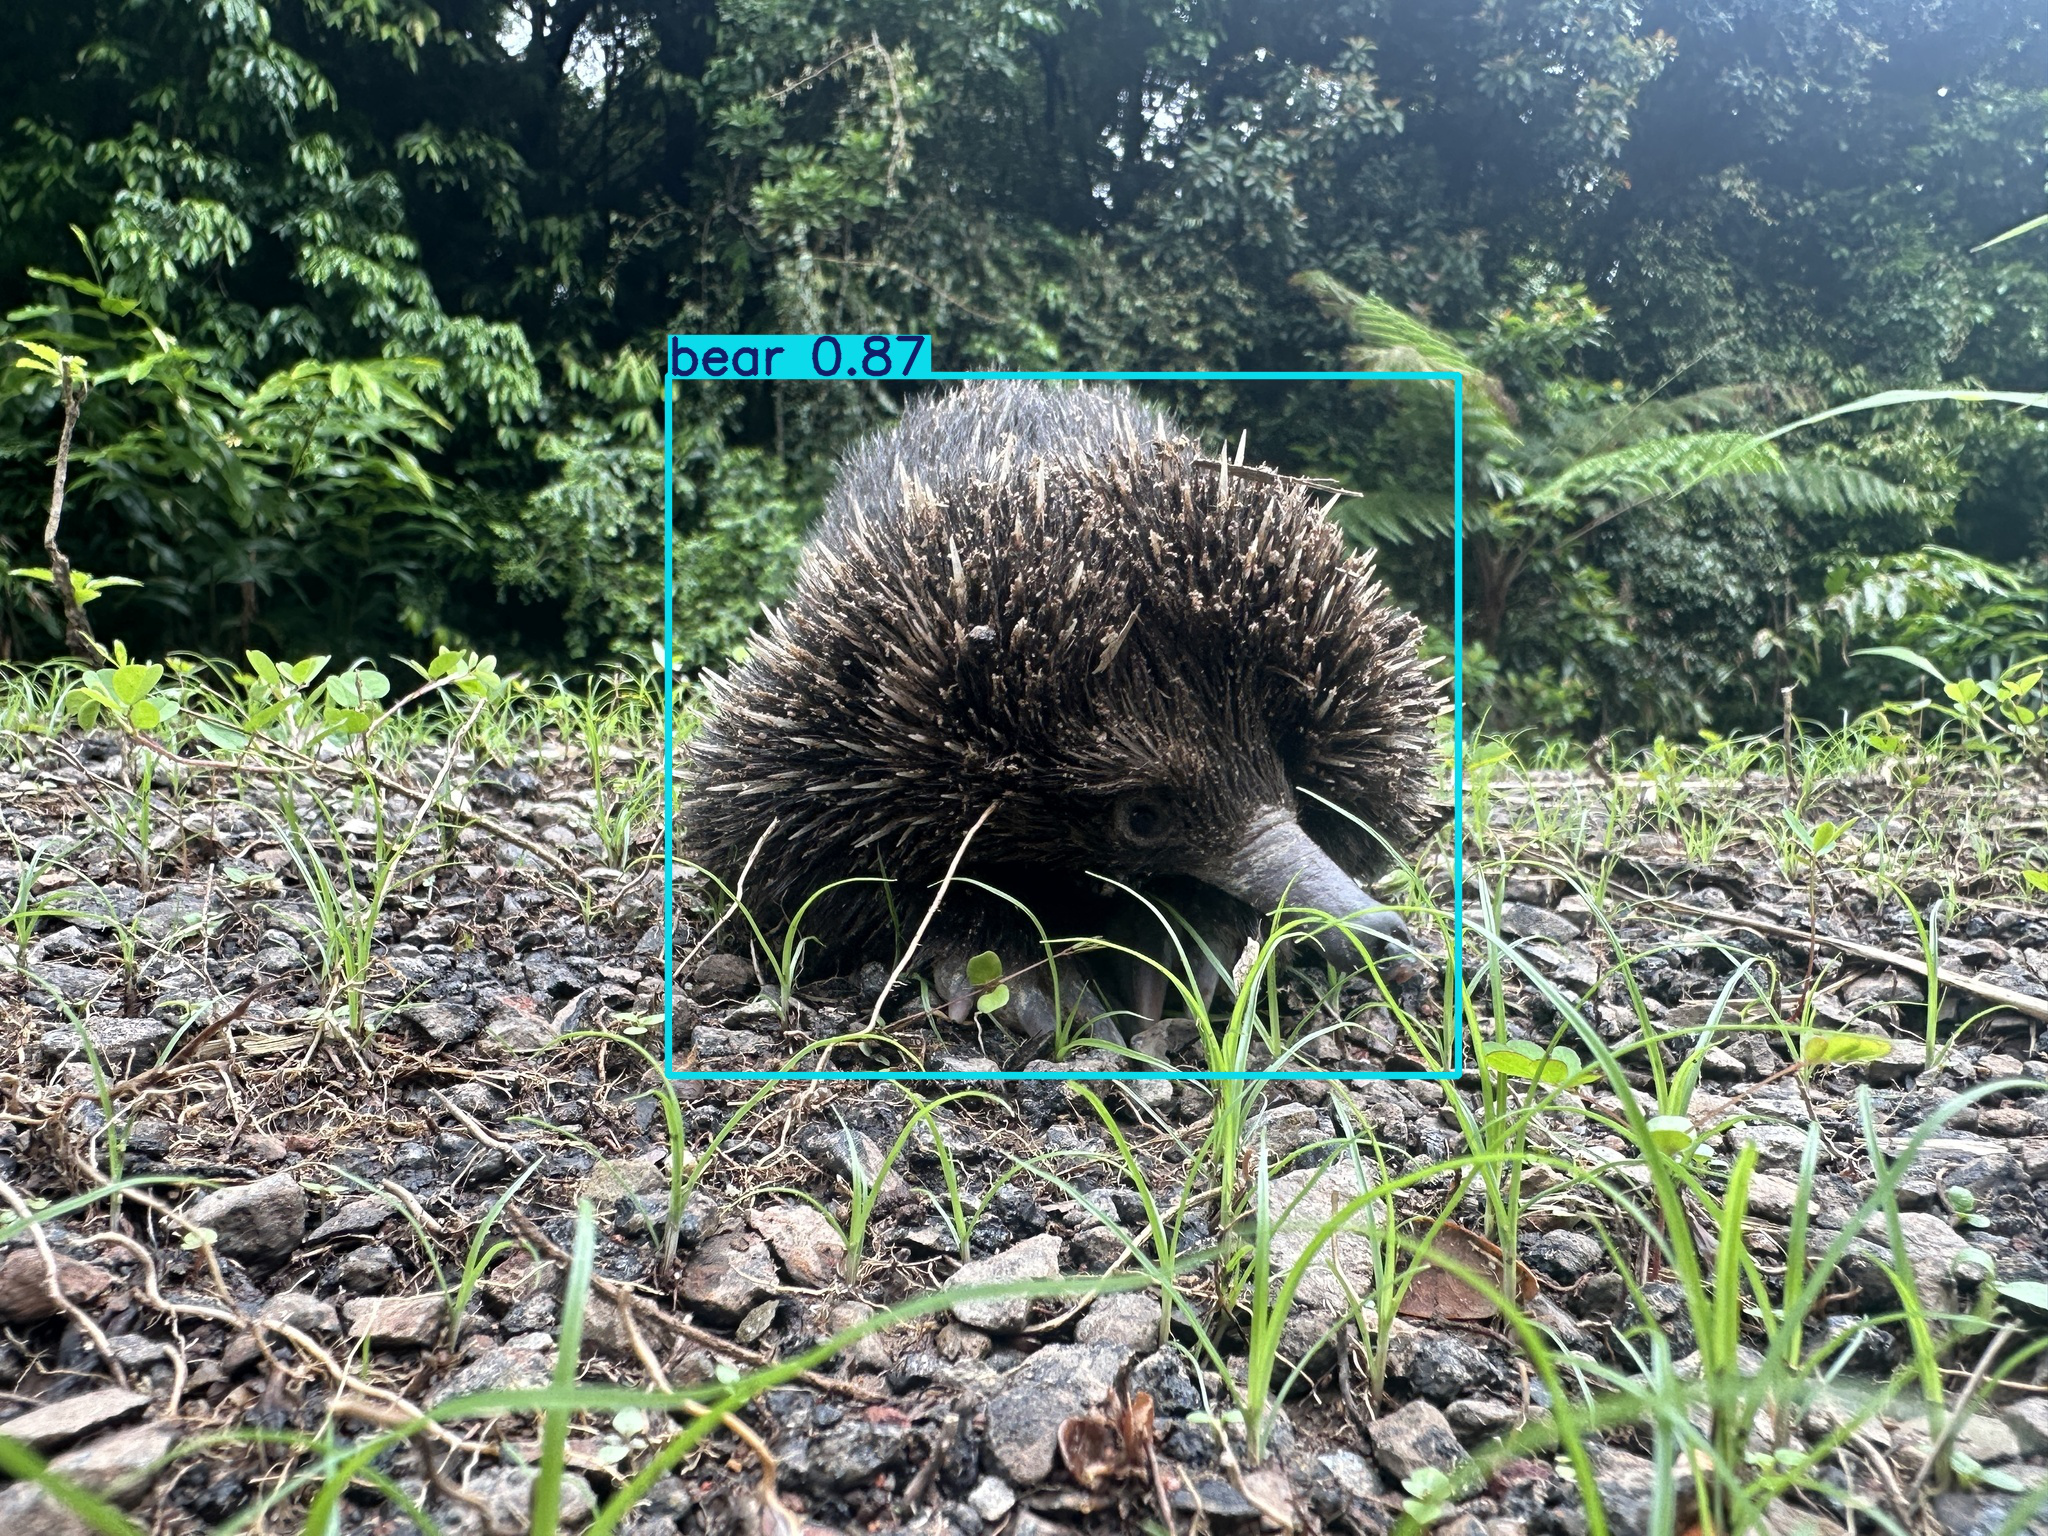

In [34]:
from IPython.display import display, Image
display(Image('0a498cce-9acf-49fd-80bc-c31707155105.png'))